<a href="https://colab.research.google.com/github/Ajay-A3933/ajay/blob/master/Industry_grade__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML Model for Auto Insurance Industry


##Aim of the Project

The aim of the project is to build a Machine Learning Model to predict whether an owner will initiate an auto insurance claim in the next year.

###Background
The auto insurance industry is witnessing a paradigm shift. Since auto insurance company consists of homogenous good thereby making it difficult to differentiate product A from product B, also companies are fighting a price war (for insurance price). On top of that, the distribution channel is shifting more from traditional insurance brokers to online purchases, which means that the ability for companies to interact through human touchpoints is limited, and customers should be quoted at a reasonable price. A good price quote is one that makes the customer purchase the policy and helps the company to increase the profits. Also, the insurance premium is calculated based on more than 50+ parameters, which means that traditional business analytics-based algorithms are now limited in their ability to differentiate among customers based on subtle parameters.

**The model shall mainly support the following use cases:**

1. **Conquering Market Share**: Capture market share by lowering the prices of the premium for the customers, who are least likely to claim.

2. **Risk Management**: Charge the right premium from the customer, who is likely to claim insurance in the coming year

3. **Smooth Processing**: Reduce the complexity of pricing models. Most of the transactions are happening online with larger customer attributes (thanks to the internet and social media). Harness the power of huge data to build complex ML models

4. **Increased Profits**: As per industry estimate 1% reduction in the claim can boost profit by 10%. So, through the ML model, we can identify and deny the insurance to the driver who will make a claim. Thus, ensuring reduced claim outgo and increased profit.

Importing libaries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.metrics import precision_score,recall_score,roc_auc_score,f1_score,cohen_kappa_score
from sklearn.utils import resample
from pprint import pprint

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Markdown, display
import statsmodels.api as sm # import API
from matplotlib.pyplot import xticks

In [ ]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
py.offline.init_notebook_mode(connected=True)
pd.options.display.float_format = '{:20,.2f}'.format
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
def log(string):
    display(Markdown("> <span style='color:blue'>"+string+"</span>"))

def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))

def get_variable_type(element) :
    """
     Check is columns are of Continuous or Categorical variable.
     Assumption is that if
                 unique count < 20 then categorical
                 unique count >= 20 and dtype = [int64 or float64] then continuous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Continous"

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix

def get_meta_data(dataframe) :
    """
     Method to get Meta-Data about any dataframe passed
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), # data types of columns
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), # total elements in columns
                    'Null_Count': dataframe.isnull().sum().astype(int), # total null values in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, # percentage of null values
                    'Unique_Values_Count': dataframe.nunique().astype(int) # number of unique values
                     })

    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def plot_data_pie_chat(dataframe,col) :
    header("Stats for "+col+" Datatype Percentage Distribution")
    dataframe_group = dataframe.groupby(col).frequency.count().reset_index()
    dataframe_group.sort_values([col], axis=0,ascending=False, inplace=True)
    trace = go.Pie(labels=dataframe_group[col].tolist(), values=dataframe_group["frequency"].tolist())
    layout = go.Layout(title="Datatype Percentage Distribution")
    fig = go.Figure(data=[trace], layout=layout)
    py.offline.iplot(fig)

def pairplot(x_axis,y_axis) :
    sns.pairplot(car_df,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

def bar_count_plot(dataframe,col_name) :
    plt.figure(figsize=(16,8))
    plt.title(col_name + 'Histogram')
    sns.countplot(dataframe[col_name], palette=("plasma"))
    xticks(rotation = 90)
    plt.show()

def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value
    greater than 10 , black otherwise.
    """
    color = 'red' if val > 5 else 'black'
    return 'color: %s' % color

def accuracy_result(y_test, y_pred_test):
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, classification_report
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    # USE THE IMPORTED CONFUSION MATRIX
    print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    false_positive_rate = round(FP / float(TN + FP),3)
    print('FPR: ', false_positive_rate)
    print('TPR/ RECALL/ SENSTIVITY: ', round(metrics.recall_score(y_test, y_pred_test), 3))
    print('PRECISION:' ,round(metrics.precision_score(y_test, y_pred_test), 3))
    specificity = round(TN / (TN + FP),3)
    print('SPECIFICITY: ',specificity)
    print('ACCURACY: ', np.round(metrics.accuracy_score(y_test, y_pred_test),3))
    print('ROC AUC: ', np.round(roc_auc_score(y_test, y_pred_test),3))
    print('Cohens kappa: ',np.round(cohen_kappa_score(y_test, y_pred_test),3))
    print('F1 score: ', np.round(f1_score(y_test, y_pred_test),3))
    print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_test))
    return

Import data

In [ ]:
df = pd.read_csv('/content/train(1).csv')
df1= df.copy()
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.70,0.20,0.72,10,1,-1,0,1,4,1,0,0,1,12,2,0.40,0.88,0.37,3.61,0.60,0.50,0.20,3.00,1.00,10.00,1.00,10.00,1.00,5.00,9.00,1.00,5.00,8.00,0.00,1.00,1.00,0.00,0.00,1.00
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.80,0.40,0.77,11,1,-1,0,-1,11,1,1,2,1,19,3,0.32,0.62,0.39,2.45,0.30,0.10,0.30,2.00,1.00,9.00,5.00,8.00,1.00,7.00,3.00,1.00,1.00,9.00,0.00,1.00,1.00,0.00,1.00,0.00
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.00,0.00,-1.00,7,1,-1,0,-1,14,1,1,2,1,60,1,0.32,0.64,0.35,3.32,0.50,0.70,0.10,2.00,2.00,9.00,1.00,8.00,2.00,7.00,4.00,2.00,7.00,7.00,0.00,1.00,1.00,0.00,1.00,0.00
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.90,0.20,0.58,7,1,0,0,1,11,1,1,3,1,104,1,0.37,0.54,0.29,2.00,0.60,0.90,0.10,2.00,4.00,7.00,1.00,8.00,4.00,2.00,2.00,2.00,4.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.70,0.60,0.84,11,1,-1,0,-1,14,1,1,2,1,82,3,0.32,0.57,0.37,2.00,0.40,0.60,0.00,2.00,2.00,6.00,3.00,10.00,2.00,12.00,3.00,1.00,1.00,3.00,0.00,0.00,0.00,1.00,1.00,0.00


In [ ]:
temp = df[:200000]
_X = temp.drop(['id','target'],axis =1)
_y=temp.target
metadata_matrix_dataframe = get_meta_data(df)
metadata_matrix_dataframe["dt_name"] =[ i.split("_")[-1] for i in metadata_matrix_dataframe.index.values]
metadata_matrix_dataframe['dt_name'] = metadata_matrix_dataframe['dt_name'].apply(lambda x : "interval" if str(x).isnumeric() else x)

In [ ]:
Dtype = metadata_matrix_dataframe.groupby(['dt_name'])

interval_feature =Dtype.get_group("interval").index.tolist()
bin_feature = Dtype.get_group("bin").index.tolist()
cat_feature = Dtype.get_group("cat").index.tolist()

In [ ]:
print(len(interval_feature),len(bin_feature),len(cat_feature))


26 17 14


In [ ]:
_y.value_counts()

0    27942
1     1091
Name: target, dtype: int64

**1.Write at least 3 important inferences from the data above**

**Ans.:**

**Data is higly imblaced, target distribtion is:**

0 = 96.36 %

1 = 3.64 %

**data have variable type:**

Interval = 45.6%

binary =29.8%

categorical = 24.6%

**Most of the features are uncorrelated**

**2.Is the data balanced? Meaning are targets 0 and 1 in the right proportion?**

**Ans.:**
**No, data not balanced. I shown below.**

Percentge distribution of class '1' & class '0':

 0                  96.24
1                   3.76
Name: target, dtype: float64


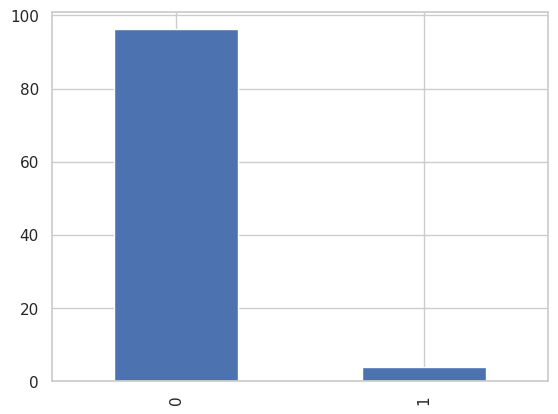

In [ ]:
perc = (df['target'].value_counts()/(df.shape[0]))*100
print("Percentge distribution of class '1' & class '0':\n\n",perc)
perc.plot.bar();

**3.How many categorical features are there?**

In [ ]:
group_variable_type = metadata_matrix_dataframe.groupby('Variable_Type')
print("categorical features count:",group_variable_type.get_group('Categorical').shape[0])

categorical features count: 51


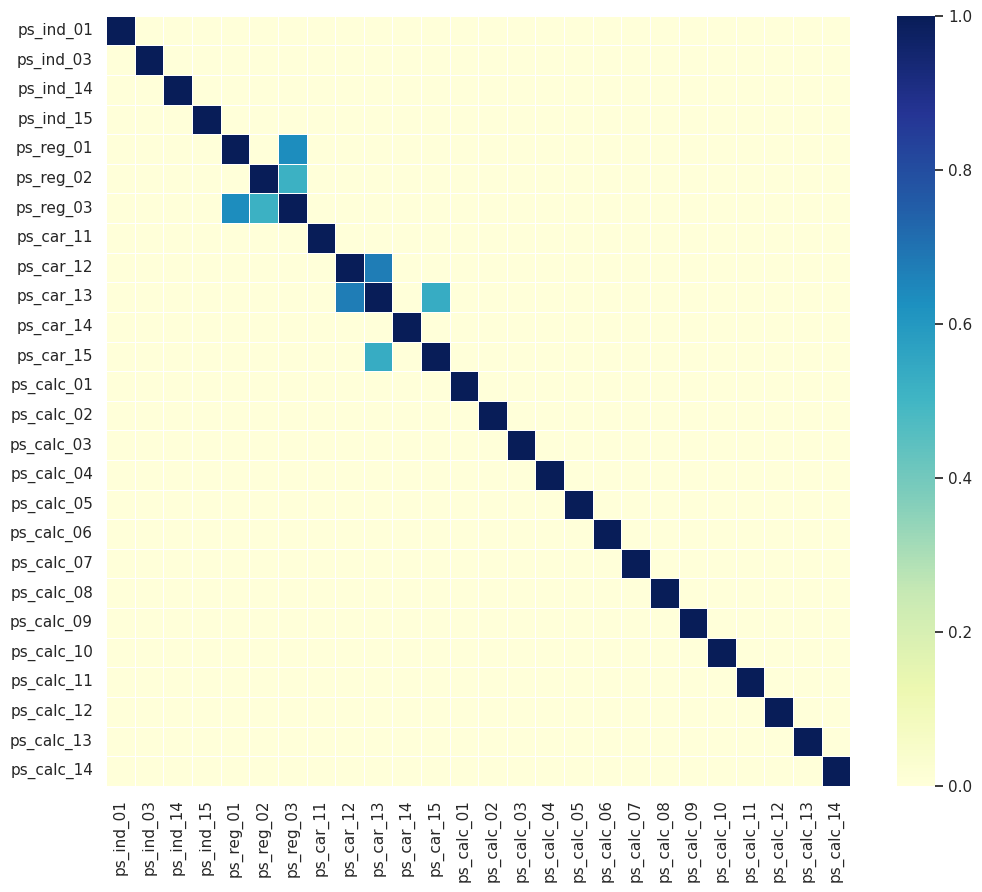

In [ ]:
temp = df[interval_feature].corr()
temp = temp[(temp>=0.5) | (temp<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(temp,linewidths=.5, cmap="YlGnBu",ax=ax)
plt.show()

**5.Write inferences from data on interval variable**

**Ans :** Almost all the features are independent, Looking at above plot only 3 features are correlated with correlation near 0.5.

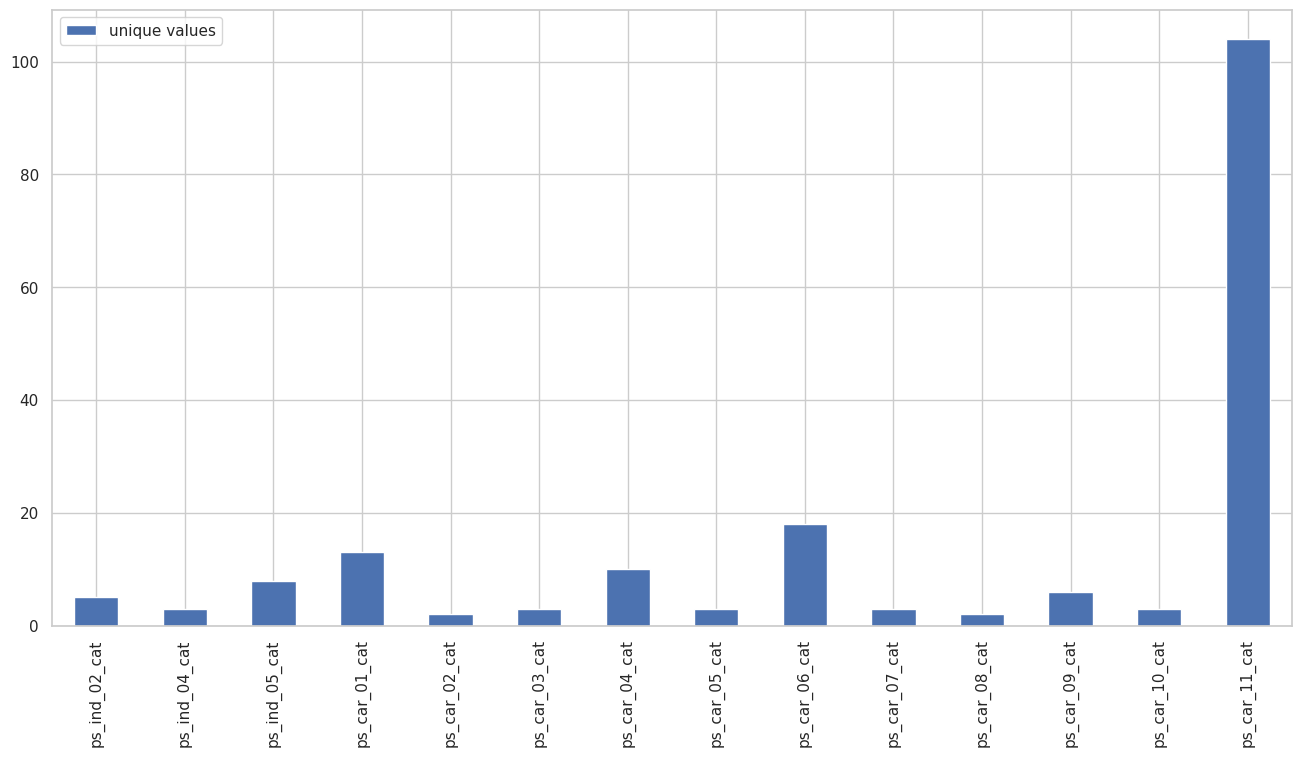

In [ ]:
d ={}
for i in df[cat_feature].columns:
    d[i] = df[cat_feature][i].nunique()

pd.DataFrame(d,index=['unique values']).T.plot.bar(figsize=(16,8));

**6.Write inferences from data on ordinal variables.**

**Ans**: Looking at above graph only one feature have unqiue values more than 20"

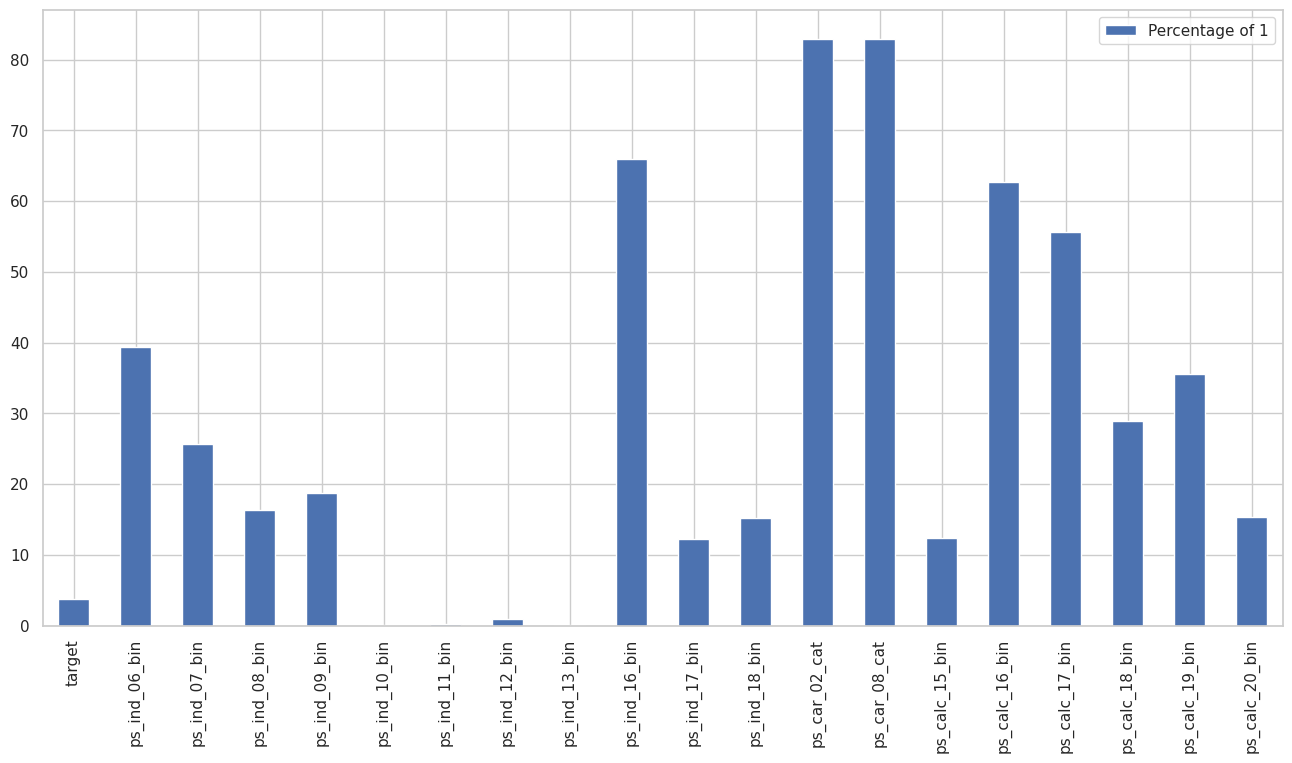

In [ ]:
col = metadata_matrix_dataframe[metadata_matrix_dataframe['Unique_Values_Count'] == 2].index
df_1 = pd.DataFrame((df[col].sum()/df[col].shape[0])*100, columns=['Percentage of 1'])
df_1.plot.bar(figsize=(16,8));


**7.Write inferences from data on binary variables.**

**Ans** : Looking at above graph % of 1's is near for *ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin.

**8.Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance?**

Target=1 shape: (1091, 59) 3.76 % 
Target=0 shape: (27942, 59) 96.24 %

 # This Data shows that it's imbalanced


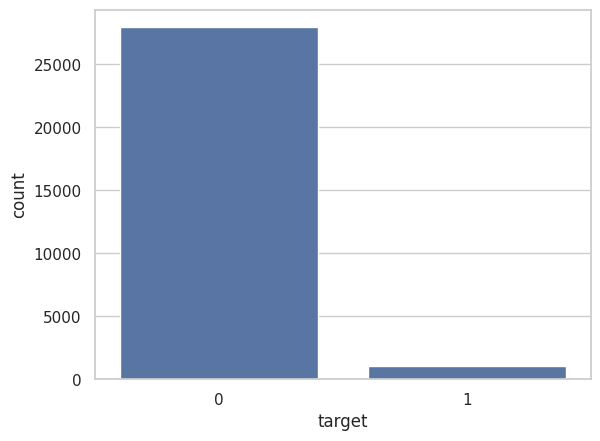

In [ ]:
Per1= np.round((df[df['target']==1].shape[0]*100)/ df.shape[0],2)
Per0= np.round((df[df['target']==0].shape[0]*100)/ df.shape[0],2)

print('Target=1 shape:',df[df['target']==1].shape, Per1,'%','\nTarget=0 shape:',df[df['target']==0].shape,Per0,'%')
print("\n # This Data shows that it's imbalanced")
sns.countplot(x= df['target'])
plt.show()

**9.What should be the preferred way in this case to balance the data?**


**Ans:** The most popular solution to an imbalanced classification problem is to change the composition of the training dataset.Techniques designed to change the class distribution in the training dataset are generally referred to as sampling methods or resampling methods as we are sampling an existing data sample

**10.How many training records are there after achieving a balance of 12%?**

In [ ]:
# resampling technique, Spliting data into classes
df_mino= df[df['target']==1]
df_majo= df[df['target']==0]
df_mino_upsampled = resample(df_mino,replace=True,n_samples=int(len(df_majo)*0.12), random_state = 42)
print("Size of data, after achieving a balance of 12%: ", df_mino_upsampled.shape[0] + df_majo.shape[0])

Size of data, after achieving a balance of 12%:  31295


Class compostion after resampling:
0    27942
1    27942
Name: target, dtype: int64


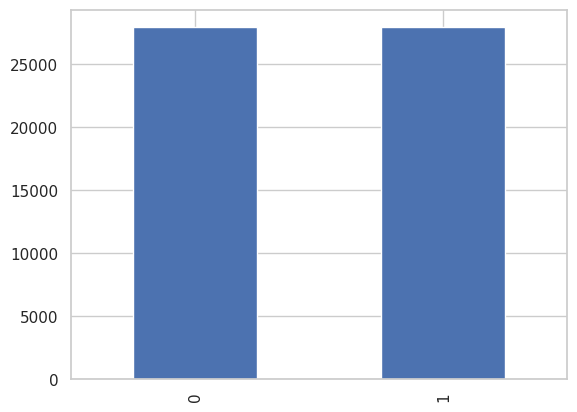

In [ ]:
#Applying Resampling to make balance data-set
df_mino_upsampled = resample(df_mino,replace=True,n_samples=len(df_majo), random_state = 42)
df = pd.concat([df_majo,df_mino_upsampled])
print("Class compostion after resampling:")
print(df['target'].value_counts())
df['target'].value_counts().plot.bar();

Now both the classes have equal counts

**11.Which are the top two features in terms of missing values?**

**Ans:** No Missing Value Found.

**12.In total, how many features have missing values?**


**Ans:** No Feature having missing values

**13.What steps should be taken to handle the missing data?**
**Ans:**
* Deleting Rows with missing values
* Impute missing values for continuous variable
* Impute missing values for categorical variable
* Other Imputation Methods
* Using Algorithms that support missing values
* Prediction of missing values
* Imputation using Deep Learning Library

**14.Which interval variables have strong correlation?**


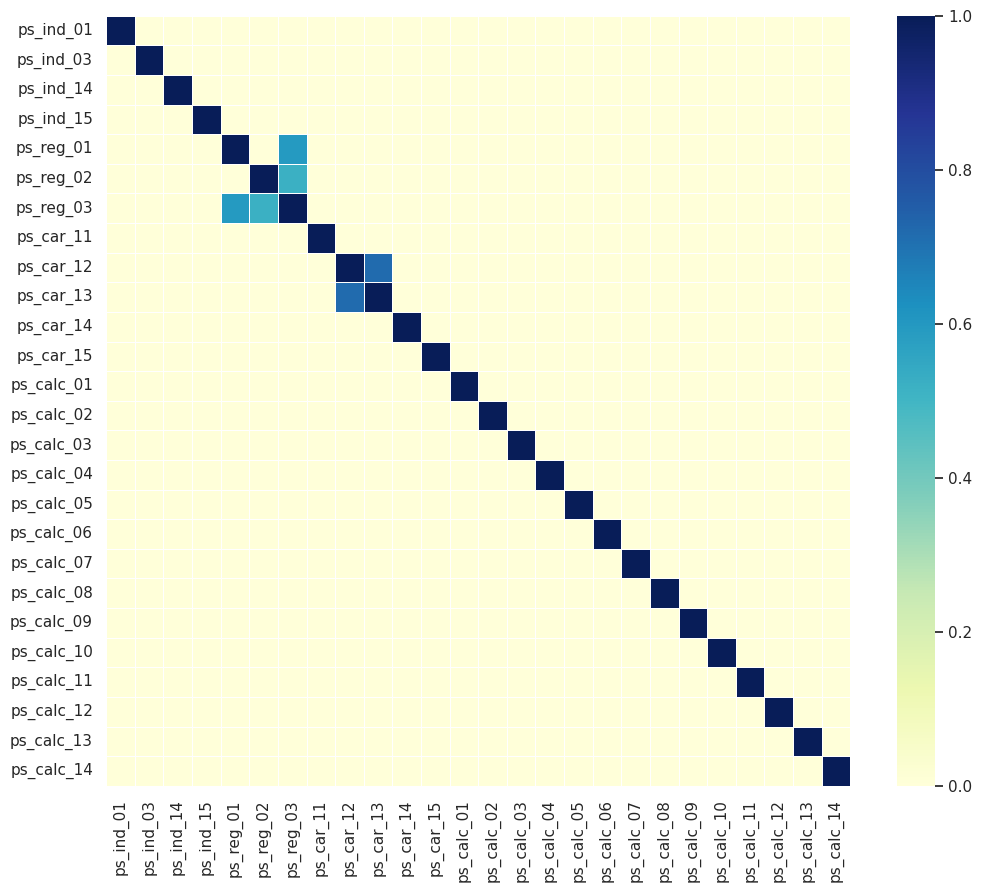

In [ ]:
temp = df[interval_feature].corr()
temp = temp[(temp>=0.5) | (temp<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(temp,linewidths=.5, cmap="YlGnBu",ax=ax)
plt.show()

interval Variable with high correlation(abs value more than 0.5)

ps_reg_03 --> ps_reg_02 & ps_reg_01


ps_reg_13 --> ps_reg_12

**15.What's the level of correlation among ordinal features?**

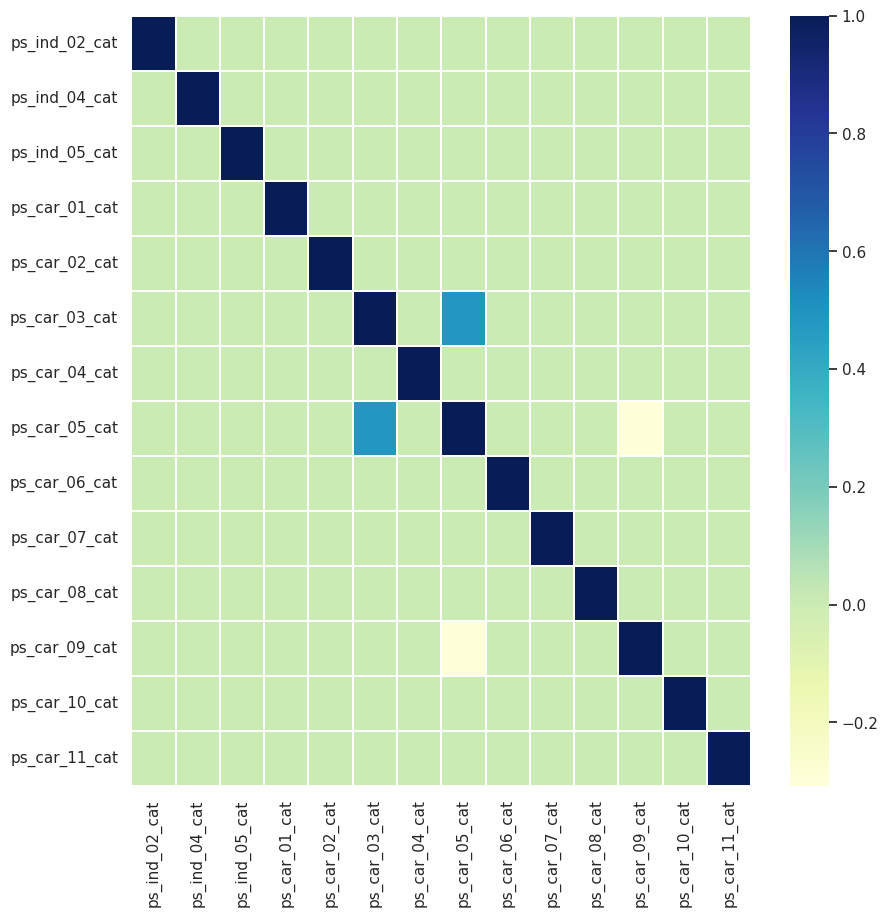

In [ ]:
temp = df[cat_feature].corr()
temp = temp[(temp>=0.3) | (temp<=-0.3)].fillna(0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(temp,linewidths=.3, cmap="YlGnBu",ax=ax)
plt.show()

Ordinal Variable with high correlation(abs value more than 0.5)

ps_car_03_cat --> ps_car_05_cat

ps_car_05_cat --> ps_car_09_cat

**16.Implement Hot Encoding for categorical features?**

**Ans:** No, nominal Features are available

**17.In nominal and interval features, which features are suitable for StandardScaler?**

**Ans:**

Nominal featues are not suitable for StandardScaler

We can apply StandardScaler in interval features

In [ ]:
_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29033 entries, 0 to 29032
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ps_ind_01       29033 non-null  int64  
 1   ps_ind_02_cat   29033 non-null  int64  
 2   ps_ind_03       29033 non-null  int64  
 3   ps_ind_04_cat   29033 non-null  int64  
 4   ps_ind_05_cat   29033 non-null  int64  
 5   ps_ind_06_bin   29033 non-null  int64  
 6   ps_ind_07_bin   29033 non-null  int64  
 7   ps_ind_08_bin   29033 non-null  int64  
 8   ps_ind_09_bin   29033 non-null  int64  
 9   ps_ind_10_bin   29033 non-null  int64  
 10  ps_ind_11_bin   29033 non-null  int64  
 11  ps_ind_12_bin   29033 non-null  int64  
 12  ps_ind_13_bin   29033 non-null  int64  
 13  ps_ind_14       29033 non-null  int64  
 14  ps_ind_15       29033 non-null  int64  
 15  ps_ind_16_bin   29033 non-null  int64  
 16  ps_ind_17_bin   29033 non-null  int64  
 17  ps_ind_18_bin   29033 non-null 

In [ ]:
_X=_X.fillna(0)

In [ ]:
_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29033 entries, 0 to 29032
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ps_ind_01       29033 non-null  int64  
 1   ps_ind_02_cat   29033 non-null  int64  
 2   ps_ind_03       29033 non-null  int64  
 3   ps_ind_04_cat   29033 non-null  int64  
 4   ps_ind_05_cat   29033 non-null  int64  
 5   ps_ind_06_bin   29033 non-null  int64  
 6   ps_ind_07_bin   29033 non-null  int64  
 7   ps_ind_08_bin   29033 non-null  int64  
 8   ps_ind_09_bin   29033 non-null  int64  
 9   ps_ind_10_bin   29033 non-null  int64  
 10  ps_ind_11_bin   29033 non-null  int64  
 11  ps_ind_12_bin   29033 non-null  int64  
 12  ps_ind_13_bin   29033 non-null  int64  
 13  ps_ind_14       29033 non-null  int64  
 14  ps_ind_15       29033 non-null  int64  
 15  ps_ind_16_bin   29033 non-null  int64  
 16  ps_ind_17_bin   29033 non-null  int64  
 17  ps_ind_18_bin   29033 non-null 

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(_X,_y)

feature_imp = pd.Series(clf.feature_importances_,index=_X.columns).sort_values(ascending=False)
imp = pd.DataFrame(feature_imp).reset_index()
imp.columns = ["Features", 'Imp']

imp['Imp'] = (imp['Imp']/max(imp['Imp']))*100
col = imp[imp["Imp"]>25]['Features'].tolist()

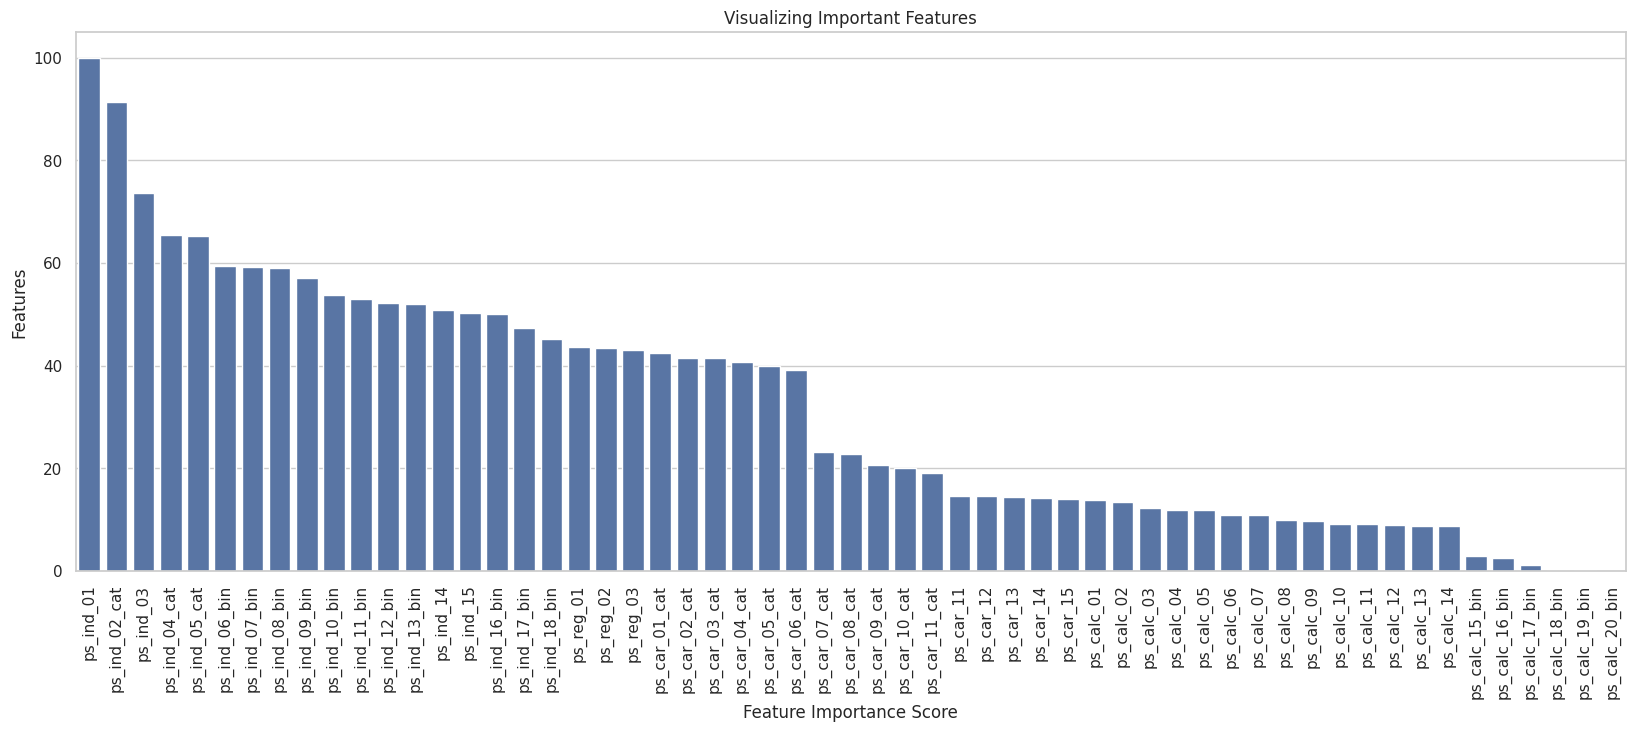

In [ ]:
# Creating a bar plot
plt.figure(figsize = (20,7))
sns.barplot(x=_X.columns, y=imp.Imp)
plt.xlabel('Feature Importance Score')
plt.xticks(rotation=90)
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
print("Top 10 ordered important features")
print(imp[:10].Features);

Top 10 ordered important features
0        ps_car_13
1        ps_reg_03
2        ps_car_14
3       ps_calc_10
4       ps_calc_14
5    ps_car_11_cat
6       ps_calc_11
7        ps_ind_15
8        ps_reg_02
9       ps_calc_02
Name: Features, dtype: object


**18.Summarize the learnings of ED**

**Data is higly imblaced, target distribtion is:**

0 = 96.36 %

1 = 3.64 %

Most of the features are uncorrelated
________________________________________________________________

**Top 10 ordered important features**

ps_car_13

ps_reg_03

ps_car_14

ps_calc_10

ps_calc_14

ps_calc_11

ps_car_11_cat

ps_ind_15

ps_ind_03

ps_calc_01

###Spliting data in feature & target (70:30)

In [ ]:
x= df.drop(['target','id'], axis=1)
y= df['target']
x=x.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression (Before Resampling)

In [ ]:
x_= df1.drop(['target','id'], axis=1)
y_= df1['target']

x_=x_.fillna(0)

from sklearn.model_selection import train_test_split as tts
X_Train,X_Test,y_Train,y_Test = tts(x_, y_, test_size = 0.3,random_state = 1)

log_reg = LogisticRegression()
log_reg.fit(X_Train, y_Train)

# y_pred_train = log_reg.predict(X_Train)
y_pred_logreg1 = log_reg.predict(X_Test)

accuracy_result(y_Test, y_pred_logreg1)


 CONFUSION MATRIX:
  [[8395    0]
 [ 315    0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0
PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.964
ROC AUC:  0.5
Cohens kappa:  0.0
F1 score:  0.0

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8395
           1       0.00      0.00      0.00       315

    accuracy                           0.96      8710
   macro avg       0.48      0.50      0.49      8710
weighted avg       0.93      0.96      0.95      8710



**Modeling Questions and their Answers**

**Q. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?**

Ans.: Simple Logistic Regression Model seems to have high accuracy because of highly imbalanced data. When we use accuracy, we assign equal cost to false positives and false negatives. When that data set is imbalanced - say it has 96% of instances in one class and only 4 % in the other - there is a great way to lower the cost. Predict that every instance belongs to the majority class, get accuracy of 96% which is very high accuracy.

**Accuracy = (correct classifications / number of classifications)**

**Q. Why do you think f1-score is 0.**0?

Ans.: In this model, the Precision and Recall both are Zero due to which F1 score also become zero.

**Q. What is the precision and recall score for the model?**

Ans.: In this model, the Precision and Recall both are Zero

Logistic Regression (After Resampling)
1. Fitting a Logistic Regressio

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#y_pred_train = log_reg.predict(X_train)
y_pred_logreg2 = log_reg.predict(X_test)

accuracy_result(y_test, y_pred_logreg2)


 CONFUSION MATRIX:
  [[5202 3288]
 [3426 4850]] 

FPR:  0.387
TPR/ RECALL/ SENSTIVITY:  0.586
PRECISION: 0.596
SPECIFICITY:  0.613
ACCURACY:  0.6
ROC AUC:  0.599
Cohens kappa:  0.199
F1 score:  0.591

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.60      0.61      0.61      8490
           1       0.60      0.59      0.59      8276

    accuracy                           0.60     16766
   macro avg       0.60      0.60      0.60     16766
weighted avg       0.60      0.60      0.60     16766



**Q.What is the accuracy score and f1-score for the improved Logistic Regression model?**

**Q.Why do you think f1-score has improved?**

Ans.:

**Logistic regression model (Before Resampling)**

Accuracy = 0.964
F1 score = 0.0


**Logistic regression model (After Resampling)**

Accuracy = 0.6
F1 score = 0.591
In above given data after resampling the F1 score is 0.591 which is improved F1 score in compare to previous score and it shows improved logistic regression model.

##Support Vector Classifier

In [ ]:
x_tr=X_train[:10000,:]
y_tr=y_train[:10000]

## 1. svm Classifier with linear kernel

#Create a svm Classifier
clf = svm.SVC(kernel='linear')
clf.fit(x_tr, y_tr)

## 2. Predicting on Train and test data

# y_pred_train = clf.predict(X_train)
y_pred_svc = clf.predict(X_test)

#  model output
accuracy_result(y_test, y_pred_svc)


 CONFUSION MATRIX:
  [[5195 3295]
 [3484 4792]] 

FPR:  0.388
TPR/ RECALL/ SENSTIVITY:  0.579
PRECISION: 0.593
SPECIFICITY:  0.612
ACCURACY:  0.596
ROC AUC:  0.595
Cohens kappa:  0.191
F1 score:  0.586

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.60      0.61      0.61      8490
           1       0.59      0.58      0.59      8276

    accuracy                           0.60     16766
   macro avg       0.60      0.60      0.60     16766
weighted avg       0.60      0.60      0.60     16766



**Q.: For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement?**

Ans.: Not any Significance Improvement

**Q.: SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?**

Ans.: I fitted the SVC model on 10K dataset because on 100K dataset not able to run the model.

XGBoost Classifier

In [ ]:
## 1. Initializing XGboost Classifier

xg_cls = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 50, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train, y_train)

## 2. Predicting on Train and test data
y_pred_xgb = xg_cls.predict(X_test)

# function for evaluating the model output
accuracy_result(y_test, y_pred_xgb)


 CONFUSION MATRIX:
  [[8450   40]
 [   0 8276]] 

FPR:  0.005
TPR/ RECALL/ SENSTIVITY:  1.0
PRECISION: 0.995
SPECIFICITY:  0.995
ACCURACY:  0.998
ROC AUC:  0.998
Cohens kappa:  0.995
F1 score:  0.998

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8490
           1       1.00      1.00      1.00      8276

    accuracy                           1.00     16766
   macro avg       1.00      1.00      1.00     16766
weighted avg       1.00      1.00      1.00     16766



**Q. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?**

Ans: In my model ,I'm getting f1 score near to 1, that indicate a best fitted model.

**Q. What is the increase in number of features after one-hot encoding of the data?**

Ans.: There is no need of One-hot encoding because it has been previously done.

**Q. Is there any improvement in scores after encoding?**

Ans.: Not happened (because There is no need of One-hot encoding so I have not done it)

**Q. If not missing a positive sample is the priority which model is best so far?**

Ans.: XGBoost model is performing best.Count of missing positive sample is 40\ only.

**Q. If not marking negative sample as positive is top priority, which model is best so far?**

Ans.: XGBoost model is performing best. No misclassification for negative sample as positive.

Adaboost classifier

In [ ]:
# Create adaboost classifer object
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = adaBoost.fit(X_train, y_train)


#Predict the response for test dataset
y_pred_ada = model1.predict(X_test)

accuracy_result(y_test, y_pred_ada)


 CONFUSION MATRIX:
  [[5309 3181]
 [3203 5073]] 

FPR:  0.375
TPR/ RECALL/ SENSTIVITY:  0.613
PRECISION: 0.615
SPECIFICITY:  0.625
ACCURACY:  0.619
ROC AUC:  0.619
Cohens kappa:  0.238
F1 score:  0.614

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.62      0.63      0.62      8490
           1       0.61      0.61      0.61      8276

    accuracy                           0.62     16766
   macro avg       0.62      0.62      0.62     16766
weighted avg       0.62      0.62      0.62     16766



**Q.: Do you think using AdaBoost can give any significant improvement over XGBoost?**

Ans.: No improvement in AdaBoost model result because In my case XGBoost model giving much more better result (Accuracy and F1 score) in compare to AdaBoost model.

MLP Classifier

In [ ]:
# Training the model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(X_train, y_train.values.ravel())

# Prediction on x_test
y_predic = mlp.predict(X_test)
accuracy_result(y_test,y_predic)


 CONFUSION MATRIX:
  [[5227 3263]
 [  78 8198]] 

FPR:  0.384
TPR/ RECALL/ SENSTIVITY:  0.991
PRECISION: 0.715
SPECIFICITY:  0.616
ACCURACY:  0.801
ROC AUC:  0.803
Cohens kappa:  0.603
F1 score:  0.831

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.62      0.76      8490
           1       0.72      0.99      0.83      8276

    accuracy                           0.80     16766
   macro avg       0.85      0.80      0.79     16766
weighted avg       0.85      0.80      0.79     16766



**Q.: MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size**?

**Q.: At what layer size we get the best f1-score?**

Ans.:

In Generally, you can't analytically calculate the number of layers or the number of nodes to use per layer in an ANN to address a specific real-world predictive modeling problem, But there are many methods for determining the correct number of neurons to use in the hidden layers, such as the following:

* The no. of hidden neurons should be between the size of the input layer and the size of the output layer.
* The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
* The no. of hidden neurons should be less than twice the size of the input layer.

## Final Result Comparision

In [ ]:
data = {'Log_Reg(Before Resamp)':[np.round(f1_score(y_Test, y_pred_logreg1),3), np.round(metrics.accuracy_score(y_Test, y_pred_logreg1),3)],
        'Log_Reg(After Resamp)':[np.round(f1_score(y_test, y_pred_logreg2),3), np.round(metrics.accuracy_score(y_test, y_pred_logreg2),3)],
        'SVC':[np.round(f1_score(y_test, y_pred_svc),3), np.round(metrics.accuracy_score(y_test, y_pred_svc),3)],
        'XGBoost':[np.round(f1_score(y_test, y_pred_xgb),3), np.round(metrics.accuracy_score(y_test, y_pred_xgb),3)],
        'AdaBoost':[np.round(f1_score(y_test, y_pred_ada),3), np.round(metrics.accuracy_score(y_test, y_pred_ada),3)],
        'MLP Classifier':[np.round(f1_score(y_test, y_predic),3), np.round(metrics.accuracy_score(y_test, y_predic),3)]}

df_result=pd.DataFrame(data, index = ['F1_score', 'Accuracy']).T
df_result

,F1_score,Accuracy
Log_Reg(Before Resamp),0.00,0.96
Log_Reg(After Resamp),0.59,0.60
SVC,0.59,0.60
XGBoost,1.00,1.00
AdaBoost,0.61,0.62
MLP Classifier,0.83,0.80


**After comparing the F1- score and Accuracy of all used Machine Learning models, we found that XGBoost model is best performing and giving best result with respect to all other**